<center><font size = "10"> Week 10 - Network Stimulation<center>
<center><font size = "8">Home Work <center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 5
<br>Group member 1: Nathan Girard
<br>Group member 2: Camil Hamdane
<br>Group member 3: Martim Lisboa
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignments to be delivered by next Monday before 23:59.
    
<font size='3'>__NOTE:__ The code from the tutorials generates random connections between cells, if you want to compare results you have to keep the same connections (same axon section connected to same basal section) between the cells. The same happens with the location of the exponential synapses. 
Make sure to reset your connections if necessary. HINT: In this homework all of the exercises are connected, this can help you avoid repeating the implementations.

## Optional: 5 neurons network: synchronous stimulation comparison

<font size='3'>  Load the five morphology reconstructions assigned to your group in week 7, using the class `Cell` defined in the tutorials: 
- Connect the neurons with `weight = 1.0`, following the first tutorial. 
- Add exponential synapses to random section of the basal dendrite of each cell (synapse `weight = 1.0` and `tau = 2`). 
- Create and compare two inputs protocols: irregular and regular synchronous stimulation. 
- Run the simulation of 300 ms and show the voltage and spike plots. 
- How do the two protocols differ?

In [1]:
!nrnivmodl

/home/In_Silico_Neuroscience/Week10
Mod files: "./vecevent.mod"

COBJS=''
 -> Compiling mod_func.c
x86_64-linux-gnu-gcc -O2   -I.   -I/usr/local/lib/python3.8/dist-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
 => LINKING shared library ./libnrnmech.so
x86_64-linux-gnu-g++ -O2 -DVERSION_INFO='8.0.0' -std=c++11 -shared -fPIC  -I /usr/local/lib/python3.8/dist-packages/neuron/.data/include -o ./libnrnmech.so -Wl,-soname,libnrnmech.so \
  ./mod_func.o ./vecevent.o  -L/usr/local/lib/python3.8/dist-packages/neuron/.data/lib -lnrniv -Wl,-rpath,/usr/local/lib/python3.8/dist-packages/neuron/.data/lib   
rm -f ./.libs/libnrnmech.so ; mkdir -p ./.libs ; cp ./libnrnmech.so ./.libs/libnrnmech.so
Successfully created x86_64/special


In [2]:
# Load usefull packages
%matplotlib inline

from neuron import h, gui
import matplotlib.pyplot as plt
import numpy as np
import random

# Load external files & initialize
h.load_file("stdrun.hoc")
h.stdinit()

--No graphics will be displayed.


0.0

In [3]:
class Cell:
    def __init__(self, filename, name, cell_type):
        self.name = name
        self.type = cell_type
        self.synapses = []
        self.build_morphology(filename)
        self.biophysics()

    def build_morphology(self, filename):
        h.load_file("import3d.hoc")
        h.load_file("stdlib.hoc")
        # morph_reader = h.Import3d_Neurolucida3()
        morph_reader = h.Import3d_SWC_read()
        morph_reader.input(filename)
        i3d = h.Import3d_GUI(morph_reader, 0)
        i3d.instantiate(
            self
        )  # Notice this change to be able to instantiate several cells

    def biophysics(self):
        for sec in h.allsec():
            sec.Ra = 100  # Axial resistance in Ohm * cm
            sec.cm = 1  # Membrane capacitance in micro Farads / cm^2
            sec.insert("pas")
            for seg in sec:
                seg.pas.g = 0.00003
                seg.pas.e = -75

        # Insert passive current in the dendrite
        for sec in self.soma:
            sec.insert("hh")
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

        if hasattr(self, "apic"):
            for sec in self.apic:
                sec.insert("hh")
                for seg in sec:
                    seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                    seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

        for sec in self.dend:
            sec.insert("hh")
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

        for sec in self.axon:
            sec.insert("hh")
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

In [4]:
# Pyr_cells = ["./Cells/Pyr_0" + str(i+1) + ".swc" for i in range(3)]
# Int_cells = ["./Cells/Int_0" + str(i+1) + ".swc" for i in range(2)]
# All_cells = np.concatenate((Pyr_cells, Int_cells), axis = 0)

Pyr_cells, Int_cells = [], []

for i in range(3):
    Pyr_cells.append(Cell("./Cells/Pyr_0" + str(i+1) + ".swc", "Pyr"+str(i+1), "Pyr"))
    if i < 2:
        Int_cells.append(Cell("./Cells/Int_0" + str(i+1) + ".swc", "Int"+str(i+1), "Int"))

all_cells = Pyr_cells + Int_cells

In [5]:
for c in all_cells:
    if c.type == "Pyr":
        print(
            "%s: %d apical sections, %d basal sections, %d soma sections and %d axon senctions"
            % (c.name, len(c.apic), len(c.dend), len(c.soma), len(c.axon))
        )
    elif c.type == "Int":
        print(
            "%s: %d basal sections, %d soma sections and %d axon senctions"
            % (c.name, len(c.dend), len(c.soma), len(c.axon))
        )

Pyr1: 27 apical sections, 17 basal sections, 1 soma sections and 89 axon senctions
Pyr2: 149 apical sections, 119 basal sections, 1 soma sections and 131 axon senctions
Pyr3: 13 apical sections, 34 basal sections, 1 soma sections and 169 axon senctions
Int1: 29 basal sections, 1 soma sections and 175 axon senctions
Int2: 53 basal sections, 1 soma sections and 224 axon senctions


In [6]:
# connect two cells with an exponential synapse at given locations
# returns the netcon
def connect(
    source,
    target,
    weight=None,
    delay=5,
    source_sec=None,
    source_neurite="axon",
    target_sec=None,
    target_neurite="dend",
):
    rng = np.random.default_rng()

    if weight is None:
        weight = rng.uniform()  # random weight

    target_neurite_ = getattr(target, target_neurite)
    if target_sec is None:
        target_sec = rng.integers(0, len(target_neurite_))  # random dendritic section

    source_neurite_ = getattr(source, source_neurite)
    if source_sec is None:
        source_sec = rng.integers(0, len(source_neurite_))  # random axonal section

    target_syn = h.ExpSyn(target_neurite_[target_sec](0.5))
    target.synapses.append(target_syn)  # store synapse

    netcon = h.NetCon(
        source_neurite_[source_sec](0.5)._ref_v,
        target_syn,
        sec=source_neurite_[source_sec],
    )
    netcon.weight[0] = weight

    print(
        f"Connected cells {source.name} -> {target.name} with weight {weight} and delay {delay}, from {source_neurite}[{source_sec}] to {target_neurite}[{target_sec}]"
    )

    return netcon

In [7]:
netcons = []  # save the netcons in case we want to modify them later

# Connect Pyr - Pyr cells
for i in range(len(Pyr_cells)):
    for j in range(len(Pyr_cells)):
        if i != j:
            nc = connect(Pyr_cells[i], Pyr_cells[j], weight=1.0)
            netcons.append(nc)
            
# Connect Pyr - Int cells
for i in range(len(Pyr_cells)):
    for j in range(len(Int_cells)):
        nc = connect(Pyr_cells[i], Int_cells[j], weight=1.0)
        netcons.append(nc)
            
# Connect Int - Pyr cells
for i in range(len(Pyr_cells)):
    for j in range(len(Int_cells)):
        nc = connect(Pyr_cells[i], Pyr_cells[j], weight=1.0, target_neurite="soma")
        netcons.append(nc)

Connected cells Pyr1 -> Pyr2 with weight 1.0 and delay 5, from axon[21] to dend[102]
Connected cells Pyr1 -> Pyr3 with weight 1.0 and delay 5, from axon[14] to dend[8]
Connected cells Pyr2 -> Pyr1 with weight 1.0 and delay 5, from axon[60] to dend[4]
Connected cells Pyr2 -> Pyr3 with weight 1.0 and delay 5, from axon[103] to dend[1]
Connected cells Pyr3 -> Pyr1 with weight 1.0 and delay 5, from axon[120] to dend[1]
Connected cells Pyr3 -> Pyr2 with weight 1.0 and delay 5, from axon[144] to dend[2]
Connected cells Pyr1 -> Int1 with weight 1.0 and delay 5, from axon[76] to dend[27]
Connected cells Pyr1 -> Int2 with weight 1.0 and delay 5, from axon[14] to dend[49]
Connected cells Pyr2 -> Int1 with weight 1.0 and delay 5, from axon[2] to dend[9]
Connected cells Pyr2 -> Int2 with weight 1.0 and delay 5, from axon[122] to dend[34]
Connected cells Pyr3 -> Int1 with weight 1.0 and delay 5, from axon[93] to dend[19]
Connected cells Pyr3 -> Int2 with weight 1.0 and delay 5, from axon[161] to de

In [8]:
# Exponential synapses in the same dendritic basal section
synapses = []

for c in all_cells:
    synapse = h.ExpSyn(c.dend[16](0.5))
    synapse.tau = 2 # ms
    
    synapses.append(synapse)
    
# Stimulator
stimulator = h.VecStim()
spike_times = np.arange(20, 140 + 1, 20)
print(f"spike times = {spike_times}")

spikes_vector = h.Vector(spike_times)
stimulator.play(spikes_vector)

spike times = [ 20  40  60  80 100 120 140]


1.0

In [9]:
# Add stimulator to synapses
connections = []
for i in range(len(all_cells)):
    connection = h.NetCon(stimulator, synapses[i])
    connection.weight[0] = 1.0 # In units of [nS] due to the gmax scaling factor in our .mod file

In [10]:
soma_vs = []
for i in range(len(all_cells)):
    soma_v = h.Vector().record(all_cells[i].soma[0](0.5)._ref_v)
    soma_vs.append(soma_v)

time = h.Vector().record(h._ref_t)

h.finitialize(-65)
h.continuerun(300)

0.0

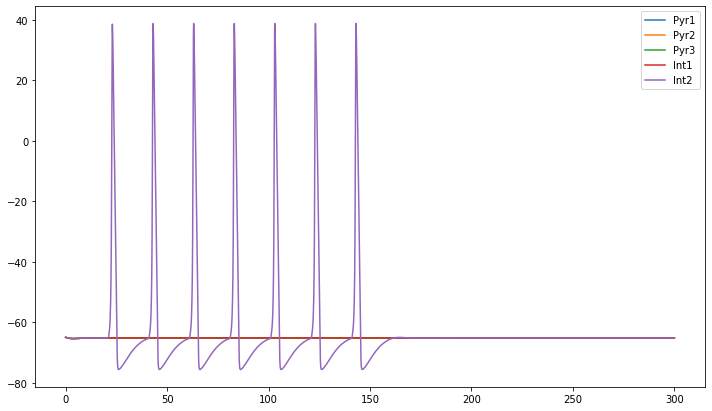

In [11]:
fig = plt.figure(figsize=(12, 7))

for i in range(len(all_cells)):
    plt.plot(time, soma_vs[i], label= all_cells[i].name)

plt.legend()
plt.show()

# <font color= 'red'>Ex 1:</font>  Regular synchronous stimulation. Half weight synaptic connections.

<font size='3'>  Load the five morphology reconstructions assigned to your group in week 7, using the class `Cell` defined in the tutorials. Explore and compare three cases of the connectivity between neurons and exponential synapses placed on a random section of the basal dendrite of each neuron. 
<font size='3'>The 3 cases you should explore are: 

1. neurons connected with `weight = 1.0` and exponential synapses connected with `weight = 1.0` and `tau = 2 ms`
2. neurons connected with `weight = 0.5` and exponential synapses connected with `weight = 1.0` and `tau = 2 ms`
3. neurons connected with `weight = 1.0` and exponential synapses connected with `weight = 0.5` and `tau = 2 ms`
 
    
<font size='3'>Make sure that you are stimulating the same parts of basal dendrites in each simulation. Run a regular synchronous stimulation protocol for 300 ms and visualize the voltage and spike plots. Describe how do outcomes of these protocols differ. What is the effect of the changed weight on the activity of the network?    
    
<font size='3'><font color= 'red'>[1.5 pts]</font>

In [28]:
def simulation_synch(Pyr_cells, Int_cells, pyr_pyr_w, pyr_int_w, int_pyr_w, int_int_w,
                     synapse_weight, tau, stim_time = 300, connect_Int = False, rand_co = False,
                     irregular_async = False):
    """
        Repeat the same protocol as in the optional exercise. 
    """
    all_cells = Pyr_cells + Int_cells
    
    # Connecting cells -------------------------------------------------------------------------------
    netcons = []

    # Connect Pyr - Pyr cells
    for i in range(len(Pyr_cells)):
        for j in range(len(Pyr_cells)):
            if i != j:
                nc = connect(Pyr_cells[i], Pyr_cells[j], weight= pyr_pyr_w)
                netcons.append(nc)

    # Connect Pyr - Int cells
    for i in range(len(Pyr_cells)):
        for j in range(len(Int_cells)):
            nc = connect(Pyr_cells[i], Int_cells[j], weight= pyr_int_w)
            netcons.append(nc)

    # Connect Int - Pyr cells
    for i in range(len(Pyr_cells)):
        for j in range(len(Int_cells)):
            nc = connect(Int_cells[j], Pyr_cells[i], weight= int_pyr_w, target_neurite="soma")
            netcons.append(nc)
            
    # Connect Int - Int cells (if connect_int = True)
    for i in range(len(Int_cells)):
        for j in range(len(Int_cells)):
            if i != j:
                nc = connect(Int_cells[i], Int_cells[j], weight= int_int_w, target_neurite="soma")
                netcons.append(nc)
            
    # Exponential synapses in the same dendritic basal section --------------------------------------
    synapses = []

    for c in all_cells:
        if rand_co:
            dends = len(c.dend)
            index_co = np.random.randint(0, dends)
        else:
            index_co = len(c.dend) - 1

        synapse = h.ExpSyn(c.dend[index_co](0.5))
        synapse.tau = tau # ms

        synapses.append(synapse)

    # Stimulator -------------------------------------------------------------------------------------
    if irregular_async:
        _, _, _ = irregular_asynchronous(synapses, synapse_weight)
    else:
        stimulator = h.VecStim()
        spike_times = np.arange(20, 140 + 1, 20)
        print(f"spike times = {spike_times}")

        spikes_vector = h.Vector(spike_times)
        stimulator.play(spikes_vector)

        # Add stimulator to synapses ---------------------------------------------------------------------
        connections = []
        for i in range(len(all_cells)):
            connection = h.NetCon(stimulator, synapses[i])
            connection.weight[0] = synapse_weight # In units of [nS] due to the gmax scaling factor in our .mod file
    
    # Soma voltage record ----------------------------------------------------------------------------
    soma_vs = []
    for i in range(len(all_cells)):
        soma_v = h.Vector().record(all_cells[i].soma[0](0.5)._ref_v)
        soma_vs.append(soma_v)

    time = h.Vector().record(h._ref_t)

    h.finitialize(-65)
    h.continuerun(stim_time)
    
    # Plotting ---------------------------------------------------------------------------------------
    fig = plt.figure(figsize=(12, 7))
    
    for i in range(len(all_cells)):
        plt.plot(time, soma_vs[i], label= all_cells[i].name)
    plt.legend()
    plt.show()
    
def generate_irregular_spiketrain(t_start, size):
    """generates irregular spike train with random inter-spike interval with expected number of spikes lambda = 30."""
    stim_times = [t_start]
    for t in np.arange(size):
        n = np.random.poisson(lam = 18)
        step = stim_times[-1] + n
        stim_times.append(step)

    return stim_times

def irregular_asynchronous(synapses, weight):
    stim_times = []
    stimulators = []
    connections = []
    
    for i in range(len(synapses)):
        stim_time = generate_irregular_spiketrain(20 + i * 10, 7)
        stim_times.append(stim_time)
        
        stimulator = h.VecStim()
        spikes_vector = h.Vector(stim_time)
        stimulator.play(spikes_vector)
        stimulators.append(stimulator)
        
        connection = h.NetCon(stimulator, synapses[i])
        connection.weight[0] = weight  # In units of [nS] due to the gmax scaling factor in our .mod file
        
    return stim_times, stimulators, connections
    

Connected cells Pyr1 -> Pyr2 with weight 1.0 and delay 5, from axon[35] to dend[22]
Connected cells Pyr1 -> Pyr3 with weight 1.0 and delay 5, from axon[15] to dend[27]
Connected cells Pyr2 -> Pyr1 with weight 1.0 and delay 5, from axon[106] to dend[7]
Connected cells Pyr2 -> Pyr3 with weight 1.0 and delay 5, from axon[122] to dend[3]
Connected cells Pyr3 -> Pyr1 with weight 1.0 and delay 5, from axon[96] to dend[8]
Connected cells Pyr3 -> Pyr2 with weight 1.0 and delay 5, from axon[58] to dend[40]
Connected cells Pyr1 -> Int1 with weight 1.0 and delay 5, from axon[62] to dend[20]
Connected cells Pyr1 -> Int2 with weight 1.0 and delay 5, from axon[27] to dend[3]
Connected cells Pyr2 -> Int1 with weight 1.0 and delay 5, from axon[26] to dend[3]
Connected cells Pyr2 -> Int2 with weight 1.0 and delay 5, from axon[22] to dend[0]
Connected cells Pyr3 -> Int1 with weight 1.0 and delay 5, from axon[81] to dend[4]
Connected cells Pyr3 -> Int2 with weight 1.0 and delay 5, from axon[8] to dend[49

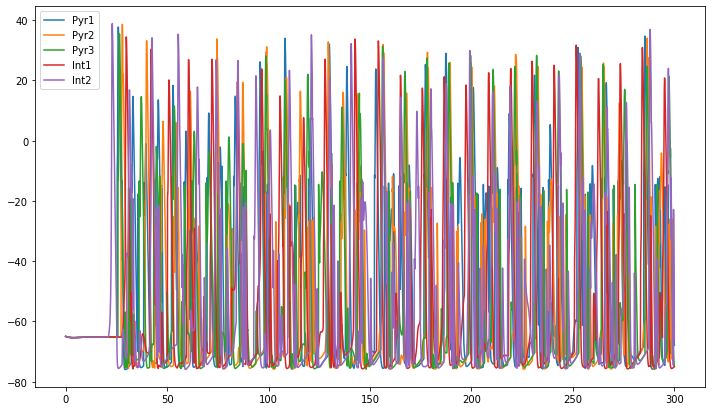

In [22]:
# 1. Neuron connection weight = 1.0, synapses weight = 1.0, and tau = 2.0
simulation_synch(Pyr_cells, Int_cells, pyr_pyr_w = 1.0, pyr_int_w = 1.0, 
                 int_pyr_w = 1.0, int_int_w = 1.0, synapse_weight = 1.0, tau = 2.0)

Connected cells Pyr1 -> Pyr2 with weight 0.5 and delay 5, from axon[81] to dend[108]
Connected cells Pyr1 -> Pyr3 with weight 0.5 and delay 5, from axon[46] to dend[0]
Connected cells Pyr2 -> Pyr1 with weight 0.5 and delay 5, from axon[88] to dend[5]
Connected cells Pyr2 -> Pyr3 with weight 0.5 and delay 5, from axon[45] to dend[31]
Connected cells Pyr3 -> Pyr1 with weight 0.5 and delay 5, from axon[90] to dend[2]
Connected cells Pyr3 -> Pyr2 with weight 0.5 and delay 5, from axon[75] to dend[22]
Connected cells Pyr1 -> Int1 with weight 0.5 and delay 5, from axon[42] to dend[22]
Connected cells Pyr1 -> Int2 with weight 0.5 and delay 5, from axon[11] to dend[17]
Connected cells Pyr2 -> Int1 with weight 0.5 and delay 5, from axon[114] to dend[14]
Connected cells Pyr2 -> Int2 with weight 0.5 and delay 5, from axon[130] to dend[25]
Connected cells Pyr3 -> Int1 with weight 0.5 and delay 5, from axon[5] to dend[17]
Connected cells Pyr3 -> Int2 with weight 0.5 and delay 5, from axon[27] to de

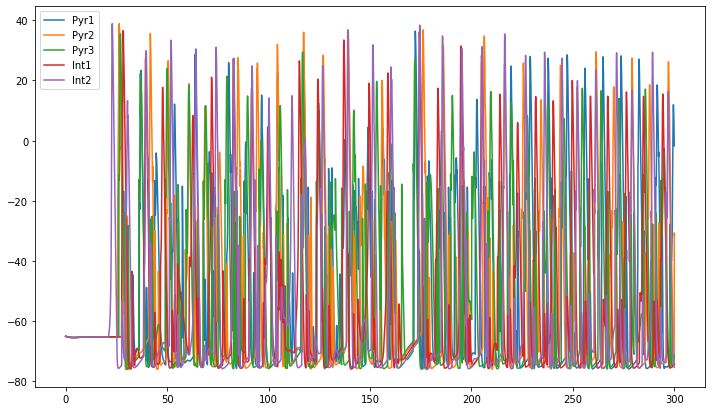

In [62]:
# 1. Neuron connection weight = 0.5, synapses weight = 1.0, and tau = 2.0
simulation_synch(Pyr_cells, Int_cells, pyr_pyr_w = 0.5, pyr_int_w = 0.5, 
                 int_pyr_w = 0.5, int_int_w = 0.5, synapse_weight = 1.0, tau = 2.0)

Connected cells Pyr1 -> Pyr2 with weight 1.0 and delay 5, from axon[46] to dend[83]
Connected cells Pyr1 -> Pyr3 with weight 1.0 and delay 5, from axon[68] to dend[6]
Connected cells Pyr2 -> Pyr1 with weight 1.0 and delay 5, from axon[114] to dend[4]
Connected cells Pyr2 -> Pyr3 with weight 1.0 and delay 5, from axon[129] to dend[31]
Connected cells Pyr3 -> Pyr1 with weight 1.0 and delay 5, from axon[50] to dend[3]
Connected cells Pyr3 -> Pyr2 with weight 1.0 and delay 5, from axon[98] to dend[8]
Connected cells Pyr1 -> Int1 with weight 1.0 and delay 5, from axon[1] to dend[16]
Connected cells Pyr1 -> Int2 with weight 1.0 and delay 5, from axon[12] to dend[51]
Connected cells Pyr2 -> Int1 with weight 1.0 and delay 5, from axon[100] to dend[16]
Connected cells Pyr2 -> Int2 with weight 1.0 and delay 5, from axon[36] to dend[35]
Connected cells Pyr3 -> Int1 with weight 1.0 and delay 5, from axon[6] to dend[14]
Connected cells Pyr3 -> Int2 with weight 1.0 and delay 5, from axon[94] to dend

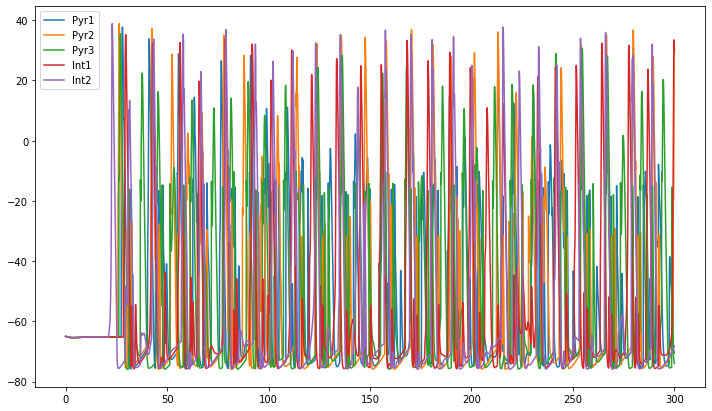

In [63]:
# 1. Neuron connection weight = 1.0, synapses weight = 0.5, and tau = 2.0
simulation_synch(Pyr_cells, Int_cells, pyr_pyr_w = 1.0, pyr_int_w = 1.0, 
                 int_pyr_w = 1.0, int_int_w = 1.0, synapse_weight = 0.5, tau = 2.0)

# <font color= 'red'>Ex 2:</font>  Inhibitory neurons: effect on the network. 
    
<font size='3'>
    
Load the five neurons following the previous exercise. Add exponential synapses (`weight = 1.0`, `tau = 2 ms`) to a random section of the basal dendrite of each cell. Create an irregular asynchronous stimulation and apply it to each exponential synapse. Run a simulation long enough to contain the last stimulation and plot the cells voltage response and the spikes.

1. Connect neurons with the following weights:
- `w(Pyr - Pyr) = 1`
- `w(Pyr - Int) = 1`
- `w(Int - Pyr) = -0.01`
- `w(Int - Int) = -0.01`
  
Plot the results in two plots one showing the cells voltage response and other with the spike detection. What is the role of the interneurons in this circuit? Experiment with different `w(Int - Pyr)` weights and describe their effect. How does the networks activity compare to positive weights?
    
    
2. Disconnect the inhibitory neurons and run the same protocol. Compare the results with the network from the first half of this exercise. Describe the role of the inhibitory neurons in small networks.

    
<font size='3'><font color= 'red'>[2 pts]</font>

Connected cells Pyr1 -> Pyr2 with weight 1.0 and delay 5, from axon[24] to dend[52]
Connected cells Pyr1 -> Pyr3 with weight 1.0 and delay 5, from axon[77] to dend[10]
Connected cells Pyr2 -> Pyr1 with weight 1.0 and delay 5, from axon[108] to dend[6]
Connected cells Pyr2 -> Pyr3 with weight 1.0 and delay 5, from axon[113] to dend[18]
Connected cells Pyr3 -> Pyr1 with weight 1.0 and delay 5, from axon[144] to dend[13]
Connected cells Pyr3 -> Pyr2 with weight 1.0 and delay 5, from axon[39] to dend[5]
Connected cells Pyr1 -> Int1 with weight 1.0 and delay 5, from axon[1] to dend[17]
Connected cells Pyr1 -> Int2 with weight 1.0 and delay 5, from axon[19] to dend[11]
Connected cells Pyr2 -> Int1 with weight 1.0 and delay 5, from axon[52] to dend[13]
Connected cells Pyr2 -> Int2 with weight 1.0 and delay 5, from axon[115] to dend[41]
Connected cells Pyr3 -> Int1 with weight 1.0 and delay 5, from axon[27] to dend[24]
Connected cells Pyr3 -> Int2 with weight 1.0 and delay 5, from axon[76] to 

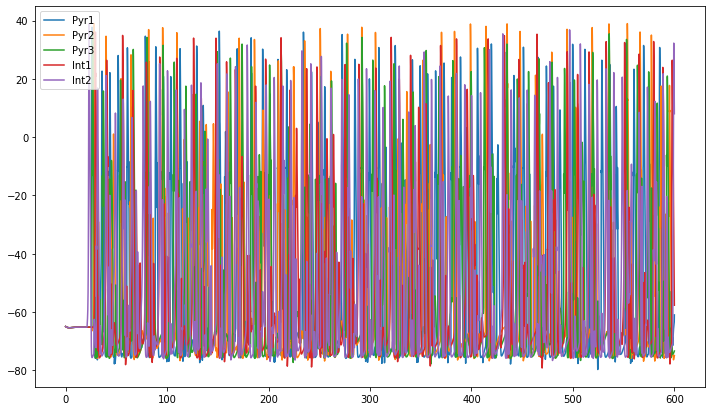

In [20]:
simulation_synch(Pyr_cells, Int_cells, pyr_pyr_w = 1.0, pyr_int_w = 1.0, 
                 int_pyr_w = -0.01, int_int_w = -0.01, synapse_weight = 1.0, tau = 2.0, 
                 stim_time = 600, connect_Int = True, rand_co = True)

# <font color= 'red'>Ex 3:</font>  Poisson Stimulation 

<font size='3'>
Load the five neurons following the previous exercises and connect them with the following weights: 

- `w(Pyr - Pyr) = 1`
- `w(Pyr - Int) = 1`
- `w(Int - Pyr) = -0.01`
- `w(Int - Int) = -0.01`

Add exponential synapses to random section of the basal dendrite of each cell (synapse `weight = 1.0` and `tau = 2 ms`). 

Design a Poisson stimulation spike train generator with use of the numpy function `np.random.poisson()`. Connect different poissonian spike trains to each of the exponential synapses. 
    
Define the Poisson distribution. Is it a good representation of the spiking activity? The provided function has one parameter `lam`, please find potential values that could be used for `lam` (through experimentation or literature search).
    
Plot and compare the incoming spike trains and networks activity with the one you obtained in irregular asynchronous stimulation protocol. 
    
<font size='3'><font color= 'red'>[2.5 pts]</font>

**Discuss :** If the Inter-spike interval (ISI) ranges between 10ms and 50ms over 300ms. Then, cells fire on average between 6 and 30 times within a 300ms time window. 

Connected cells Pyr1 -> Pyr2 with weight 1.0 and delay 5, from axon[79] to dend[96]
Connected cells Pyr1 -> Pyr3 with weight 1.0 and delay 5, from axon[53] to dend[25]
Connected cells Pyr2 -> Pyr1 with weight 1.0 and delay 5, from axon[67] to dend[8]
Connected cells Pyr2 -> Pyr3 with weight 1.0 and delay 5, from axon[44] to dend[18]
Connected cells Pyr3 -> Pyr1 with weight 1.0 and delay 5, from axon[141] to dend[9]
Connected cells Pyr3 -> Pyr2 with weight 1.0 and delay 5, from axon[159] to dend[115]
Connected cells Pyr1 -> Int1 with weight 1.0 and delay 5, from axon[12] to dend[18]
Connected cells Pyr1 -> Int2 with weight 1.0 and delay 5, from axon[68] to dend[50]
Connected cells Pyr2 -> Int1 with weight 1.0 and delay 5, from axon[86] to dend[12]
Connected cells Pyr2 -> Int2 with weight 1.0 and delay 5, from axon[55] to dend[16]
Connected cells Pyr3 -> Int1 with weight 1.0 and delay 5, from axon[141] to dend[15]
Connected cells Pyr3 -> Int2 with weight 1.0 and delay 5, from axon[71] to

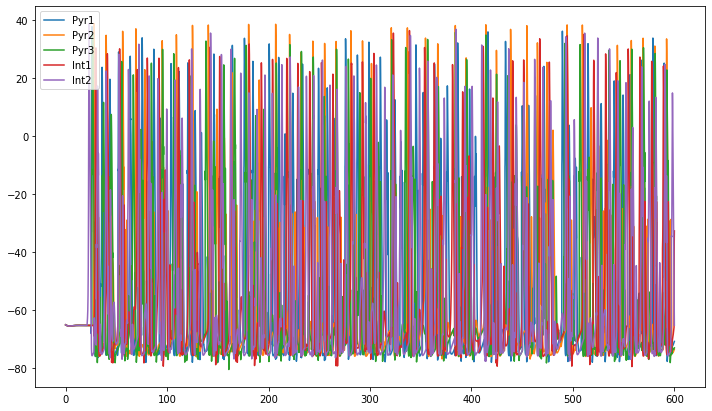

In [29]:
simulation_synch(Pyr_cells, Int_cells, pyr_pyr_w = 1.0, pyr_int_w = 1.0, 
                 int_pyr_w = -0.01, int_int_w = -0.01, synapse_weight = 1.0, tau = 2.0, 
                 stim_time = 600, connect_Int = True, rand_co = True, irregular_async = True)